In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras import metrics
import tensorflow as tf
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.regularizers import l2
from keras.layers import MaxPooling2D
from copy import deepcopy
import statistics
from statistics import mean 
import time
from minisom import MiniSom
from hyperopt import fmin, tpe, hp
import time

Using TensorFlow backend.


In [2]:
nex_nq500 = pd.read_csv("../DJF_CASM_99per_8005_nex_nq500.txt", header = None, delim_whitespace=True)
nex_nqv2m = pd.read_csv("../DJF_CASM_99per_8005_nex_nqv2m.txt", header = None, delim_whitespace=True)
nex_nqv10m = pd.read_csv("../DJF_CASM_99per_8005_nex_nqv10m.txt", header = None, delim_whitespace=True)
nex_nrh500 = pd.read_csv("../DJF_CASM_99per_8005_nex_nrh500.txt", header = None, delim_whitespace=True)
nex_nrh700 = pd.read_csv("../DJF_CASM_99per_8005_nex_nrh700.txt", header = None, delim_whitespace=True)
nex_nt2m = pd.read_csv("../DJF_CASM_99per_8005_nex_nt2m.txt", header = None, delim_whitespace=True)
nex_nt2mdew = pd.read_csv("../DJF_CASM_99per_8005_nex_nt2mdew.txt", header = None, delim_whitespace=True)
nex_nt10m = pd.read_csv("../DJF_CASM_99per_8005_nex_nt10m.txt", header = None, delim_whitespace=True)
nex_nt500 = pd.read_csv("../DJF_CASM_99per_8005_nex_nt500.txt", header = None, delim_whitespace=True)
nex_ntpw = pd.read_csv("../DJF_CASM_99per_8005_nex_ntpw.txt", header = None, delim_whitespace=True)
nex_nu2m = pd.read_csv("../DJF_CASM_99per_8005_nex_nu2m.txt", header = None, delim_whitespace=True)
nex_nu10m = pd.read_csv("../DJF_CASM_99per_8005_nex_nu10m.txt", header = None, delim_whitespace=True)
nex_nu500 = pd.read_csv("../DJF_CASM_99per_8005_nex_nu500.txt", header = None, delim_whitespace=True)
nex_nuqv = pd.read_csv("../DJF_CASM_99per_8005_nex_nuqv.txt", header = None, delim_whitespace=True)
nex_nv2m = pd.read_csv("../DJF_CASM_99per_8005_nex_nv2m.txt", header = None, delim_whitespace=True)
nex_nv10m = pd.read_csv("../DJF_CASM_99per_8005_nex_nv10m.txt", header = None, delim_whitespace=True)
nex_nv500 = pd.read_csv("../DJF_CASM_99per_8005_nex_nv500.txt", header = None, delim_whitespace=True)
nex_nvqv = pd.read_csv("../DJF_CASM_99per_8005_nex_nvqv.txt", header = None, delim_whitespace=True)
nex_nw500 = pd.read_csv("../DJF_CASM_99per_8005_nex_nw500.txt", header = None, delim_whitespace=True)

ex_nq500 = pd.read_csv("../DJF_CASM_99per_8005_ex_nq500.txt", header = None, delim_whitespace=True)
ex_nqv2m = pd.read_csv("../DJF_CASM_99per_8005_ex_nqv2m.txt", header = None, delim_whitespace=True)
ex_nqv10m = pd.read_csv("../DJF_CASM_99per_8005_ex_nqv10m.txt", header = None, delim_whitespace=True)
ex_nrh500 = pd.read_csv("../DJF_CASM_99per_8005_ex_nrh500.txt", header = None, delim_whitespace=True)
ex_nrh700 = pd.read_csv("../DJF_CASM_99per_8005_ex_nrh700.txt", header = None, delim_whitespace=True)
ex_nt2m = pd.read_csv("../DJF_CASM_99per_8005_ex_nt2m.txt", header = None, delim_whitespace=True)
ex_nt2mdew = pd.read_csv("../DJF_CASM_99per_8005_ex_nt2mdew.txt", header = None, delim_whitespace=True)
ex_nt10m = pd.read_csv("../DJF_CASM_99per_8005_ex_nt10m.txt", header = None, delim_whitespace=True)
ex_nt500 = pd.read_csv("../DJF_CASM_99per_8005_ex_nt500.txt", header = None, delim_whitespace=True)
ex_ntpw = pd.read_csv("../DJF_CASM_99per_8005_ex_ntpw.txt", header = None, delim_whitespace=True)
ex_nu2m = pd.read_csv("../DJF_CASM_99per_8005_ex_nu2m.txt", header = None, delim_whitespace=True)
ex_nu10m = pd.read_csv("../DJF_CASM_99per_8005_ex_nu10m.txt", header = None, delim_whitespace=True)
ex_nu500 = pd.read_csv("../DJF_CASM_99per_8005_ex_nu500.txt", header = None, delim_whitespace=True)
ex_nuqv = pd.read_csv("../DJF_CASM_99per_8005_ex_nuqv.txt", header = None, delim_whitespace=True)
ex_nv2m = pd.read_csv("../DJF_CASM_99per_8005_ex_nv2m.txt", header = None, delim_whitespace=True)
ex_nv10m = pd.read_csv("../DJF_CASM_99per_8005_ex_nv10m.txt", header = None, delim_whitespace=True)
ex_nv500 = pd.read_csv("../DJF_CASM_99per_8005_ex_nv500.txt", header = None, delim_whitespace=True)
ex_nvqv = pd.read_csv("../DJF_CASM_99per_8005_ex_nvqv.txt", header = None, delim_whitespace=True)
ex_nw500 = pd.read_csv("../DJF_CASM_99per_8005_ex_nw500.txt", header = None, delim_whitespace=True)


nq500_0619 = pd.read_csv("../DJF_CASM_0619_nq500.txt", header = None, delim_whitespace=True)
nqv2m_0619 = pd.read_csv("../DJF_CASM_0619_nqv2m.txt", header = None, delim_whitespace=True)
nqv10m_0619 = pd.read_csv("../DJF_CASM_0619_nqv10m.txt", header = None, delim_whitespace=True)
nrh500_0619 = pd.read_csv("../DJF_CASM_0619_nrh500.txt", header = None, delim_whitespace=True)
nrh700_0619 = pd.read_csv("../DJF_CASM_0619_nrh700.txt", header = None, delim_whitespace=True)
nt2m_0619 = pd.read_csv("../DJF_CASM_0619_nt2m.txt", header = None, delim_whitespace=True)
nt2mdew_0619 = pd.read_csv("../DJF_CASM_0619_nt2mdew.txt", header = None, delim_whitespace=True)
nt10m_0619 = pd.read_csv("../DJF_CASM_0619_nt10m.txt", header = None, delim_whitespace=True)
nt500_0619 = pd.read_csv("../DJF_CASM_0619_nt500.txt", header = None, delim_whitespace=True)
ntpw_0619 = pd.read_csv("../DJF_CASM_0619_ntpw.txt", header = None, delim_whitespace=True)
nu2m_0619 = pd.read_csv("../DJF_CASM_0619_nu2m.txt", header = None, delim_whitespace=True)
nu10m_0619 = pd.read_csv("../DJF_CASM_0619_nu10m.txt", header = None, delim_whitespace=True)
nu500_0619 = pd.read_csv("../DJF_CASM_0619_nu500.txt", header = None, delim_whitespace=True)
nuqv_0619 = pd.read_csv("../DJF_CASM_0619_nuqv.txt", header = None, delim_whitespace=True)
nv2m_0619 = pd.read_csv("../DJF_CASM_0619_nv2m.txt", header = None, delim_whitespace=True)
nv10m_0619 = pd.read_csv("../DJF_CASM_0619_nv10m.txt", header = None, delim_whitespace=True)
nv500_0619 = pd.read_csv("../DJF_CASM_0619_nv500.txt", header = None, delim_whitespace=True)
nvqv_0619 = pd.read_csv("../DJF_CASM_0619_nvqv.txt", header = None, delim_whitespace=True)
nw500_0619 = pd.read_csv("../DJF_CASM_0619_nw500.txt", header = None, delim_whitespace=True)

In [3]:
indicator_0619 = pd.read_csv("../DJF_CASM_99per_0619_indicator.txt", header = None, delim_whitespace=True)
test_set_y_initial = indicator_0619[4]
test_y = test_set_y_initial.to_numpy().reshape(1, test_set_y_initial.shape[0])

In [4]:
def train_som(x, y, input_len, sigma, learning_rate, data):
    som = MiniSom(x=x,
              y=y,
              input_len = input_len,
              sigma = sigma,
              learning_rate = learning_rate              
             )
    som.random_weights_init(data)
    start_time = time.time()
    som.train_random(data, iterations)
    elapsed_time = time.time() - start_time
    print(elapsed_time, "seconds")
    return som

def plot_som(som, data, target):
    plt.figure(figsize = (16,12))
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ['o','s','D']
    colors = ['r','g','b']
    for cnt, xx in enumerate(data):
        w = som.winner(xx)
        plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor = 'None', markeredgecolor = colors[target[cnt]],
            markersize = 12, markeredgewidth = 2)
    axis([0,som._weights.shape[0], 0,som._weights.shape[1]])
    show()

In [6]:
def get_train_test_balanced(nex_names, ex_names, test_names):
    nex_combo_7905 = pd.concat(nex_names, axis = 1)
    nex_combo_7905["label"] = 0

    ex_combo_7905 = pd.concat(ex_names, axis = 1)
    ex_combo_7905["label"] = 1

    combo_7905_df = pd.concat([ex_combo_7905, nex_combo_7905])

    train_combo_y_initial = combo_7905_df['label'].to_numpy()
    #train_combo_y = train_combo_y_initial.reshape(1, train_combo_y_initial.shape[0])
    train_combo_x = combo_7905_df.iloc[:,0:combo_7905_df.shape[1]-1].to_numpy()

    test_df = pd.concat(test_names, axis = 1)

    test_combo_x = test_df.to_numpy()

    over = SMOTE(sampling_strategy=0.043)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    #transform the dataset
    train_combo_x, train_combo_y = pipeline.fit_resample(train_combo_x, train_combo_y_initial)
    train_combo_x, train_combo_y = shuffle(train_combo_x, train_combo_y, random_state = 0)
    #summarize the new class distribution
    train_combo_y = train_combo_y.reshape(1, train_combo_y.shape[0])
    #print(train_combo_y)
    return train_combo_x, test_combo_x, train_combo_y

In [7]:
def conf_matrix(predictions, y):
    cm = np.zeros((2,2), dtype = int)
    for i in range(y.shape[1]):
        if(y[0,i] == 1 and predictions[0,i] == 1):
            cm[0,0] += 1
        if(y[0,i] == 1 and predictions[0,i] == 0):
            cm[0,1] += 1
        if(y[0,i] == 0 and predictions[0,i] == 1):
            cm[1,0] += 1
        if(y[0,i] == 0 and predictions[0,i] == 0):
            cm[1,1] += 1
    return cm

def evalmetrics(cm):
    tp = cm[0,0]
    fn = cm[0,1]
    fp = cm[1,0]
    tn = cm[1,1]

    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    precision = tp/(tp+fp)
    f1 = 2*precision*tpr/(precision + tpr)

    return tpr, fpr, f1

def create_model():
    model = Sequential()
    #add model layers
    model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(29,33,channels), activity_regularizer=l2(0.001)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32, kernel_size=3, activation='relu', activity_regularizer=l2(0.001)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, kernel_size=3, activation='relu', activity_regularizer=l2(0.001)))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    return model

def pred_train(predictions_train, shape):
    preds_train = np.zeros((1, shape[0]))
    for i in range(len(predictions_train)):

        first = predictions_train[i,0]
        second = predictions_train[i,1]

        if(first > second):
            preds_train[0,i] = 0
        else:
            preds_train[0,i] = 1
    return preds_train

def pred_test(predictions_test, shape):
    preds_test = np.zeros((1, 1263))
    for i in range(len(predictions_test)):

        first = predictions_test[i,0]
        second = predictions_test[i,1]

        if(first > second):
            preds_test[0,i] = 0
        else:
            preds_test[0,i] = 1
    return preds_test


In [62]:
def classify(som, train_x, train_y, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(train_x, train_y)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [81]:
def som_analysis(nex, ex, test):
    train_x, test_x, train_y = get_train_test_balanced(nex, ex, test)
    train_y = train_y.reshape((train_y.shape[1],))
    print(train_y.shape)
    print(np.sum(train_y))
    som = MiniSom(5, 7, train_x.shape[1], sigma=1.5, learning_rate=0.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)

    som.train(train_x, 1000, verbose=True)
    label_names = {0:'Non-Extreme', 1:'Extreme'}
    w_x, w_y = zip(*[som.winner(d) for d in train_x])
    w_x = np.array(w_x)
    w_y = np.array(w_y)
    colors = ['C0', 'C1']
    plt.figure(figsize=(10, 9))
    plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
    plt.colorbar()

    for c in np.unique(train_y):
        idx_target = train_y==c
        plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                    w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                    s=50, c=colors[c-1], label=label_names[c])
    plt.legend(loc='upper right')
    plt.grid()
    # plt.savefig('resulting_images/som_seed.png')
    plt.show()
    result = classify(som, train_x, train_y, test_x)
    result = np.array(result)
    cm_test = conf_matrix(result.reshape((1, result.shape[0])), test_y)
    confusion_test = pd.DataFrame(cm_test, index=['actual_extreme (34)', 'actual_non-extreme (1229)'],
                             columns=['predicted_extreme','predicted_non-extreme'])

    display(confusion_test)
    tpr, fpr, f1 = evalmetrics(cm_test)
    print("True positive rate: %f" %(tpr))
    print("False positive rate: %f" %(fpr))
    print("F1 score: %f" %(f1))

 [  446 / 1000 ]  45% - 0:00:00 left 

 [  889 / 1000 ]  89% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 27.243167594379667


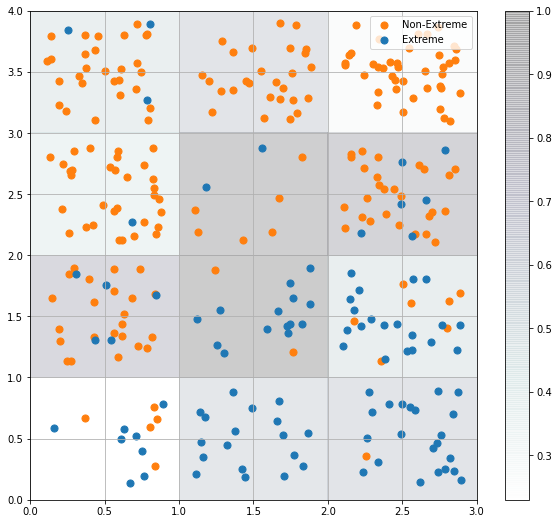

,predicted_extreme,predicted_non-extreme
actual_extreme (34),26,8
actual_non-extreme (1229),109,1120


True positive rate: 0.764706
False positive rate: 0.088690
F1 score: 0.307692


In [68]:
som_analysis([nex_nuqv], [ex_nuqv], [nuqv_0619])

 [  439 / 1000 ]  44% - 0:00:00 left 

 [  876 / 1000 ]  88% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 26.25818257860988


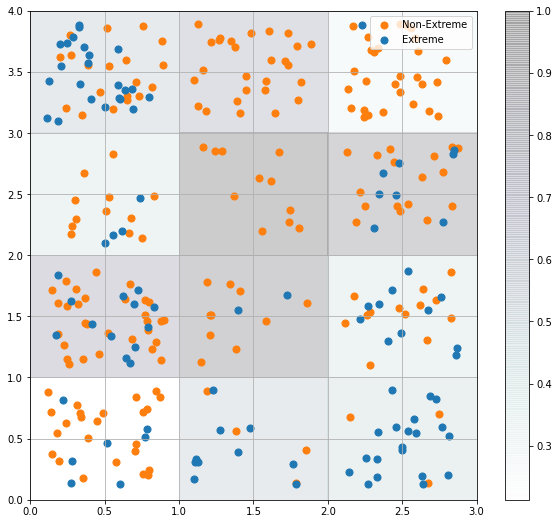

,predicted_extreme,predicted_non-extreme
actual_extreme (34),13,21
actual_non-extreme (1229),166,1063


True positive rate: 0.382353
False positive rate: 0.135069
F1 score: 0.122066


In [76]:
som_analysis([nex_nt2m], [ex_nt2m], [nt2m_0619])

 [  359 / 1000 ]  36% - 0:00:00 left 

 [  713 / 1000 ]  71% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 38.55050439978855


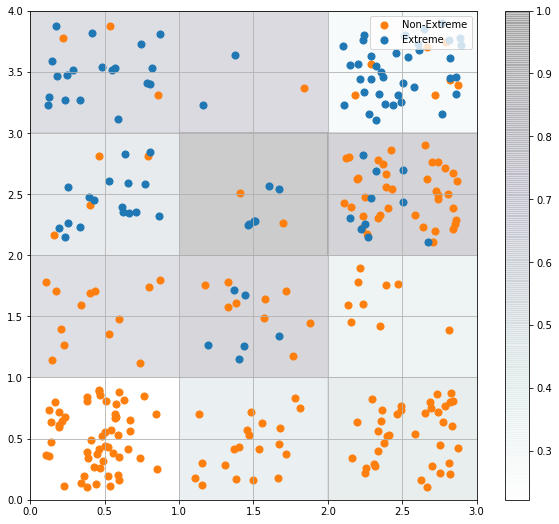

,predicted_extreme,predicted_non-extreme
actual_extreme (34),25,9
actual_non-extreme (1229),88,1141


True positive rate: 0.735294
False positive rate: 0.071603
F1 score: 0.340136


In [71]:
som_analysis([nex_nuqv, nex_ntpw], [ex_nuqv, ex_ntpw], [nuqv_0619, ntpw_0619])

 [  298 / 1000 ]  30% - 0:00:00 left 

 [  588 / 1000 ]  59% - 0:00:00 left 

 [  849 / 1000 ]  85% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 48.45203824055956


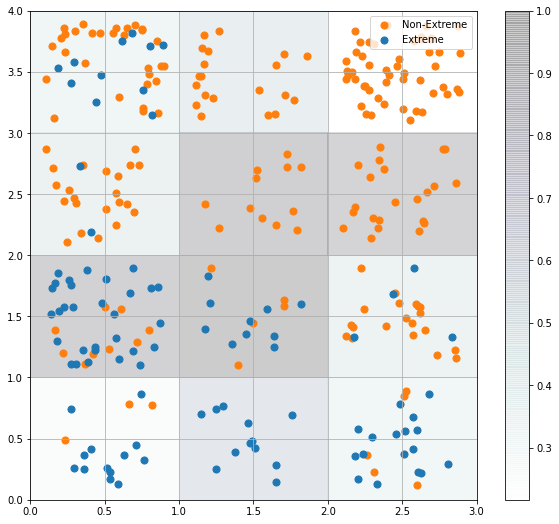

,predicted_extreme,predicted_non-extreme
actual_extreme (34),27,7
actual_non-extreme (1229),123,1106


True positive rate: 0.794118
False positive rate: 0.100081
F1 score: 0.293478


In [73]:
som_analysis([nex_nuqv, nex_ntpw, nex_nu500], [ex_nuqv, ex_ntpw, ex_nu500], [nuqv_0619, ntpw_0619, nu500_0619])

 [  541 / 1000 ]  54% - 0:00:00 left 

 [  991 / 1000 ]  99% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 27.150439389872677


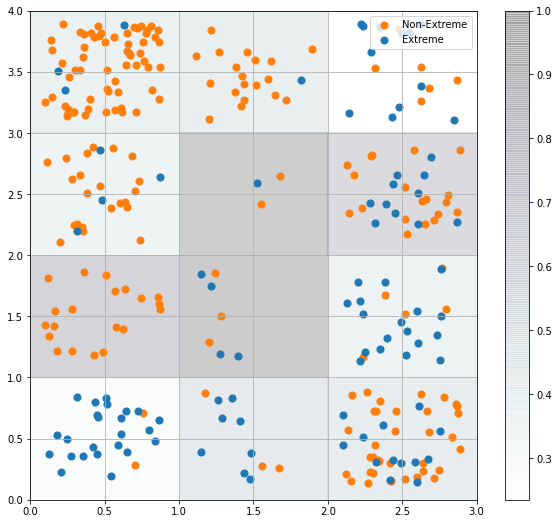

,predicted_extreme,predicted_non-extreme
actual_extreme (34),14,20
actual_non-extreme (1229),140,1089


True positive rate: 0.411765
False positive rate: 0.113914
F1 score: 0.148936


In [74]:
som_analysis([nex_nt2m], [ex_nt2m], [nt2m_0619])

 [  301 / 1000 ]  30% - 0:00:00 left 

 [  585 / 1000 ]  58% - 0:00:00 left 

 [  865 / 1000 ]  86% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 24.866133365429178


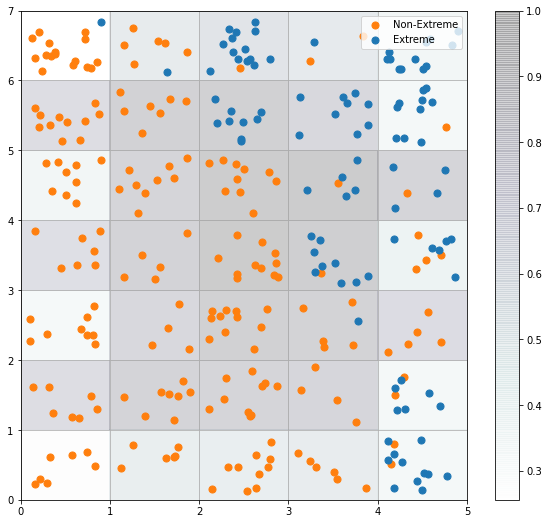

,predicted_extreme,predicted_non-extreme
actual_extreme (34),26,8
actual_non-extreme (1229),127,1102


True positive rate: 0.764706
False positive rate: 0.103336
F1 score: 0.278075


In [79]:
som_analysis([nex_nuqv], [ex_nuqv], [nuqv_0619])

 [  282 / 1000 ]  28% - 0:00:00 left 

 [  568 / 1000 ]  57% - 0:00:00 left 

 [  854 / 1000 ]  85% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 23.158540037155593


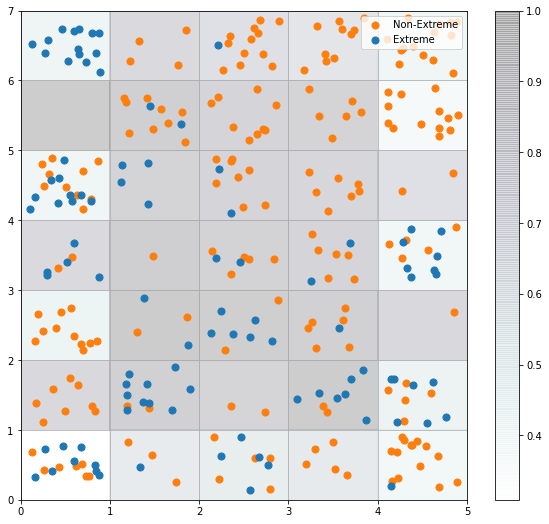

,predicted_extreme,predicted_non-extreme
actual_extreme (34),13,21
actual_non-extreme (1229),237,992


True positive rate: 0.382353
False positive rate: 0.192840
F1 score: 0.091549


In [80]:
som_analysis([nex_nt2m], [ex_nt2m], [nt2m_0619])